In [2]:
%load_ext autoreload
%autoreload 2

import tqdm
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import numpy as np
from scipy.stats import norm, stats

def calculate_percentile(sample, mean, std_dev):
    z_score = (sample - mean) / std_dev  # Calculate the z-score
    percentile = norm.cdf(z_score) * 100  # Calculate the percentile
    return percentile

from parse_genome import AlzheimerRiskProfiler

In [87]:
profiler = AlzheimerRiskProfiler(None)

pop_size = 1_000_0

pop_prs = np.zeros(pop_size)
for i in tqdm.tqdm(range(pop_size)):
    genome_dict = profiler.create_synthetic_genome_dict()
    prs = profiler.get_prs(genome_dict)
    pop_prs[i] = prs

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 629.31it/s]


0.337115 0.4937868637124726


<Axes: ylabel='Density'>

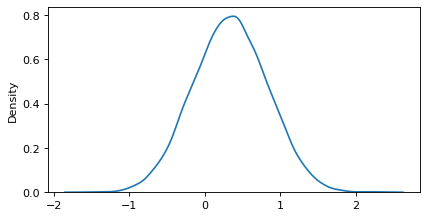

In [88]:
mu = np.mean(pop_prs)
sigma = np.std(pop_prs)

print(mu, sigma)
plt.figure(figsize=(6, 3), dpi=80)
sns.kdeplot(pop_prs)


In [4]:


profiler = AlzheimerRiskProfiler(open(r'C:\Users\pcgou\Downloads\example.txt', 'rb'))
sample = profiler.get_risk()

calculate_percentile(sample, mu, sigma)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [91]:
profiler = AlzheimerRiskProfiler(None)

pop_size = 1_000_000

pop_overall_risk = np.zeros(pop_size)
for i in tqdm.tqdm(range(pop_size)):
    genome_dict = profiler.create_synthetic_genome_dict()
    prs = profiler.get_prs(genome_dict)
    overall_risk = profiler.get_overall_risk(prs, genome_dict)
    pop_overall_risk[i] = overall_risk

100%|███████████████████████████████████████████████████████████████████████| 1000000/1000000 [52:31<00:00, 317.31it/s]


0.3537653500000001 0.6590824759006854


<Axes: ylabel='Density'>

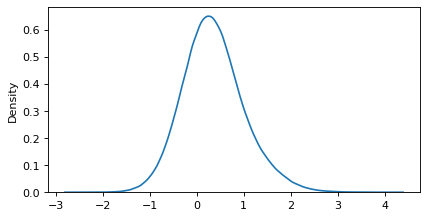

In [92]:
mu = np.mean(pop_overall_risk)
sigma = np.std(pop_overall_risk)

print(mu, sigma)
plt.figure(figsize=(6, 3), dpi=80)
sns.kdeplot(pop_overall_risk)


In [93]:
percentiles = np.linspace(0, 1, 1000+1)[1:-1]
idx = (percentiles * len(pop_overall_risk)).astype(int)

sorted_pop_overall_risk = np.array(sorted(pop_overall_risk))
distribution = sorted_pop_overall_risk[idx]

In [94]:
import pandas as pd
df = pd.DataFrame(np.array([percentiles, distribution]).T, columns=['percentile', 'score'])
df.to_csv('overall_risk_score_simulation_results', index=False)

In [81]:
df

,percentile,score
0,0.001,-1.31
1,0.002,-1.20
2,0.003,-1.13
3,0.004,-1.07
4,0.005,-1.03
...,...,...
994,0.995,2.73
995,0.996,2.80
996,0.997,2.90
997,0.998,3.01


In [5]:
def get_percentile(sample, score, percentiles):
    return percentiles[np.argmin(np.abs(score - (sample)))] * 100

df = pd.read_csv('overall_risk_score_simulation_results')

get_percentile(0.36, df.score, df.percentile)

NameError: name 'pd' is not defined

In [2]:
import pandas as pd
df = pd.read_csv('percentile_to_risk.csv')

def get_risk_from_percentile(percentile, gender):
    return df.loc[df['Percentile'] == percentile, gender].values[0]

def get_risk_with_intervention(percentile, gender):
    raw_risk = get_risk_from_percentile(percentile, gender)
    risk_with_intervention = raw_risk * 0.4 
    return df.iloc[(df[gender] - risk_with_intervention).abs().argsort()[0]]['Percentile']
    

In [3]:
get_risk_with_intervention(70.2,'Female')

IndexError: index 0 is out of bounds for axis 0 with size 0